In [33]:
from keras.models import Sequential
import keras.layers
from keras.callbacks import EarlyStopping, History
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.preprocessing import sequence
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Flatten
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D

In [34]:
#Extraemos los datos
dataset = pd.read_csv('sequences.txt', sep=",")

In [35]:
dataset.head()

,sequence,Bound
0,CAATCTTTCCTAGCAACTGTTGTCATTGCTGCTGGACTTTAGAACT...,1
1,TCAGATTTCAATTTAGACATCTATTGCCTCAATGTTTGCTGTGAGG...,1
2,CGCCTGATTAGGGGTCGTCATCAGTCCGCGCACCCTGCCTGTACTT...,1
3,CTGGAGGAAGTAAATCATCAAGCTGTAAGTTACACAATGCATGTGT...,1
4,TTGTTTTCAGAGCAGATGGGCTTGTTTGCTTTTTGCTTAAACATTA...,1


In [36]:
dataset

,sequence,Bound
0,CAATCTTTCCTAGCAACTGTTGTCATTGCTGCTGGACTTTAGAACT...,1
1,TCAGATTTCAATTTAGACATCTATTGCCTCAATGTTTGCTGTGAGG...,1
2,CGCCTGATTAGGGGTCGTCATCAGTCCGCGCACCCTGCCTGTACTT...,1
3,CTGGAGGAAGTAAATCATCAAGCTGTAAGTTACACAATGCATGTGT...,1
4,TTGTTTTCAGAGCAGATGGGCTTGTTTGCTTTTTGCTTAAACATTA...,1
...,...,...
502995,ATCTGATTTGGTGGCTCTGTCTGAGTGACTCATACTTACCAGGGTC...,0
502996,ATTTCCACTATTGCCTTCAAGTAGTACTTCCATGCTAAGCTGACAT...,0
502997,ATAAGTATGTATATATAATACACTATTATATTATATGTCAAAAATA...,0
502998,CTAGTCAGGATGGTGCAATGCTGTTTGGGAGTTGAATTGCCTGTGA...,0


In [37]:
x = dataset['sequence'].astype(str).tolist()
y = dataset['Bound']

In [38]:
def onehot_encode_sequences(sequences):
    onehot = []
    mapping = {'A': 0, 'C': 1, 'G': 2, 'T': 3}
    for sequence in sequences:
        arr = np.zeros((len(sequence), 4)).astype("float")
        for (i, letter) in enumerate(sequence):
            arr[i, mapping[letter]] = 1.0
        onehot.append(arr)
    return onehot

x_one_hot = onehot_encode_sequences(x)

In [39]:
x_final = np.array(list(x for x in x_one_hot))

In [40]:
x_final.shape

(503000, 101, 4)

In [41]:
y.shape

(503000,)

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_final, y, test_size=0.2, random_state=0, stratify=y)

In [69]:
#Modelo CNN
model_CNN = Sequential([Conv1D(filters=16, kernel_size=15, activation='relu', input_shape=x_train.shape[1:]),
                    MaxPooling1D(pool_size=4), Flatten(),Dense(units=25),
                    Dense(units=1),
                    Activation('sigmoid')
                   ])

In [70]:
model_CNN.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [71]:
model_CNN.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 87, 16)            976       
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 21, 16)            0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 336)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 25)                8425      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 26        
_________________________________________________________________
activation_7 (Activation)    (None, 1)                 0         
Total params: 9,427
Trainable params: 9,427
Non-trainable params: 0
____________________________________________________

In [72]:
#Modelo híbrido
model_hyb = Sequential()
model_hyb.add(Conv1D(filters=4,
                 kernel_size=5,
                 padding='valid',
                 activation='relu',
                 strides=1, input_shape=x_train.shape[1:]))
model_hyb.add(MaxPooling1D(pool_size=4))
model_hyb.add(LSTM(units=50))
model_hyb.add(Dense(units=25))
model_hyb.add(Dense(units=1))
model_hyb.add(Activation('sigmoid'))

In [73]:
model_hyb.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [74]:
model_hyb.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 97, 4)             84        
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 24, 4)             0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                11000     
_________________________________________________________________
dense_15 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 26        
_________________________________________________________________
activation_8 (Activation)    (None, 1)                 0         
Total params: 12,385
Trainable params: 12,385
Non-trainable params: 0
__________________________________________________

In [49]:
#Modelo LSTM
model_LSTM = Sequential()
model_LSTM.add(LSTM(units=50, input_shape=x_train.shape[1:]))
model_LSTM.add(Dense(units=25))
model_LSTM.add(Dense(units=1))
model_LSTM.add(Activation('sigmoid'))

In [50]:
model_LSTM.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [51]:
model_LSTM.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 50)                11000     
_________________________________________________________________
dense_11 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 26        
_________________________________________________________________
activation_6 (Activation)    (None, 1)                 0         
Total params: 12,301
Trainable params: 12,301
Non-trainable params: 0
_________________________________________________________________


In [52]:
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

In [75]:
#prueba inicial modelo CNN
history_CNN = model_CNN.fit(x_train, y_train,validation_split=0.2, callbacks=[EarlyStopping(patience=5),
                               History()],batch_size=64,epochs=50)

Train on 321920 samples, validate on 80480 samples
Epoch 1/50
321920/321920 [==============================] - 29s 91us/step - loss: 0.5922 - accuracy: 0.6744 - val_loss: 0.5444 - val_accuracy: 0.7192
Epoch 2/50
321920/321920 [==============================] - 29s 90us/step - loss: 0.5323 - accuracy: 0.7275 - val_loss: 0.5281 - val_accuracy: 0.7295
Epoch 3/50
321920/321920 [==============================] - 29s 90us/step - loss: 0.5133 - accuracy: 0.7405 - val_loss: 0.5072 - val_accuracy: 0.7430
Epoch 4/50
321920/321920 [==============================] - 29s 90us/step - loss: 0.5026 - accuracy: 0.7466 - val_loss: 0.5032 - val_accuracy: 0.7484
Epoch 5/50
321920/321920 [==============================] - 29s 90us/step - loss: 0.4986 - accuracy: 0.7494 - val_loss: 0.5015 - val_accuracy: 0.7495
Epoch 6/50
321920/321920 [==============================] - 29s 90us/step - loss: 0.4963 - accuracy: 0.7511 - val_loss: 0.4967 - val_accuracy: 0.7525
Epoch 7/50
321920/321920 [=======================

In [76]:
#prueba inicial modelo híbrido
history_HYB = model_hyb.fit(x_train, y_train,validation_split=0.2, callbacks=[EarlyStopping(patience=5),
                               History()],batch_size=64,epochs=50)

Train on 321920 samples, validate on 80480 samples
Epoch 1/50
321920/321920 [==============================] - 150s 467us/step - loss: 0.6572 - accuracy: 0.6042 - val_loss: 0.6386 - val_accuracy: 0.6321
Epoch 2/50
321920/321920 [==============================] - 151s 471us/step - loss: 0.6330 - accuracy: 0.6389 - val_loss: 0.6245 - val_accuracy: 0.6496
Epoch 3/50
321920/321920 [==============================] - 150s 465us/step - loss: 0.6245 - accuracy: 0.6480 - val_loss: 0.6180 - val_accuracy: 0.6554
Epoch 4/50
321920/321920 [==============================] - 150s 467us/step - loss: 0.6194 - accuracy: 0.6533 - val_loss: 0.6131 - val_accuracy: 0.6590
Epoch 5/50
321920/321920 [==============================] - 151s 469us/step - loss: 0.6158 - accuracy: 0.6571 - val_loss: 0.6100 - val_accuracy: 0.6651
Epoch 6/50
321920/321920 [==============================] - 151s 468us/step - loss: 0.6115 - accuracy: 0.6615 - val_loss: 0.6074 - val_accuracy: 0.6662
Epoch 7/50
321920/321920 [===========

In [57]:
#prueba inicial modelo LSTM
history = model_LSTM.fit(x_train, y_train,validation_split=0.2, callbacks=[EarlyStopping(patience=5),
                               History()],batch_size=64,epochs=50)

Train on 321920 samples, validate on 80480 samples
Epoch 1/50
321920/321920 [==============================] - 433s 1ms/step - loss: 0.6884 - accuracy: 0.5375 - val_loss: 0.6858 - val_accuracy: 0.5482
Epoch 2/50
321920/321920 [==============================] - 419s 1ms/step - loss: 0.6874 - accuracy: 0.5404 - val_loss: 0.6792 - val_accuracy: 0.5681
Epoch 3/50
321920/321920 [==============================] - 439s 1ms/step - loss: 0.6653 - accuracy: 0.5930 - val_loss: 0.6567 - val_accuracy: 0.6119
Epoch 4/50
321920/321920 [==============================] - 437s 1ms/step - loss: 0.6027 - accuracy: 0.6700 - val_loss: 0.5578 - val_accuracy: 0.7109
Epoch 5/50
321920/321920 [==============================] - 436s 1ms/step - loss: 0.5407 - accuracy: 0.7227 - val_loss: 0.5145 - val_accuracy: 0.7418
Epoch 6/50
321920/321920 [==============================] - 436s 1ms/step - loss: 0.5007 - accuracy: 0.7503 - val_loss: 0.4890 - val_accuracy: 0.7602
Epoch 7/50
321920/321920 [=======================

In [60]:
def evaluate(model, x, y):
    
    keras_metrics = {name: metric 
                     for name, metric in zip(model.metrics_names, 
                                             model.evaluate(x, y, verbose=0))}
    y_pred = model.predict(x)
    
    return {**keras_metrics}

In [77]:
evaluate(model_CNN, x_test, y_test)

{'accuracy': 0.7588767409324646, 'loss': 0.484703387467572}

In [78]:
evaluate(model_hyb, x_test, y_test)

{'accuracy': 0.6853876709938049, 'loss': 0.5888005729840242}

In [64]:
evaluate(model_LSTM, x_test, y_test)

{'accuracy': 0.8233698010444641, 'loss': 0.4011606156162429}

In [67]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

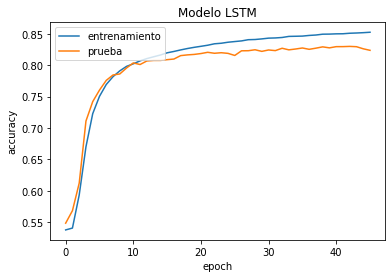

In [79]:
#historial modelo LSTM
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Modelo LSTM')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['entrenamiento', 'prueba'], loc='upper left')
plt.show()

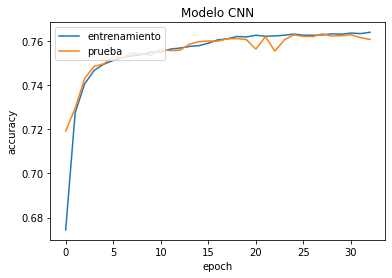

In [81]:
#historial modelo CNN
plt.plot(history_CNN.history['accuracy'])
plt.plot(history_CNN.history['val_accuracy'])
plt.title('Modelo CNN')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['entrenamiento', 'prueba'], loc='upper left')
plt.show()

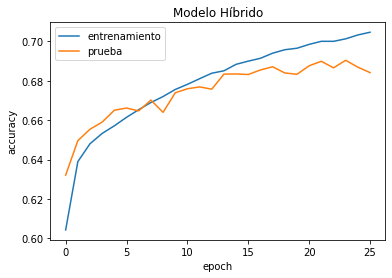

In [84]:
#historial modelo Hybrid
plt.plot(history_HIB.history['accuracy'])
plt.plot(history_HIB.history['val_accuracy'])
plt.title('Modelo Híbrido')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['entrenamiento', 'prueba'], loc='upper left')
plt.show()